In [1]:
%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

import os
from itertools import product
import heapq
import re

import pandas as pd
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling

from IPython import display
from matplotlib import pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, average_precision_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from fuzzywuzzy.fuzz import ratio, token_set_ratio, token_sort_ratio, partial_ratio

/Users/fritshermans/opt/anaconda3/lib/python3.8/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
from datasets import load_data
from deduplipy.active_learning import ActiveStringMatchLearner
from deduplipy.string_matcher import StringMatcher
from deduplipy.blocking import Blocking
from deduplipy.clustering import hierarchical_clustering
from deduplipy.deduplicator import Deduplicator

In [3]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 500)
pd.set_option('display.max_colwidth', 200)

## Load data 

In [4]:
X_train, X_test, y_train, y_test = load_data(return_pairs=True)

## StringMatcher

In [29]:
myStringMatcher = StringMatcher().fit(X_train, y_train)

In [30]:
myStringMatcher.score(X_train, y_train)

0.9798115746971737

In [31]:
myStringMatcher.score(X_test, y_test)

0.975609756097561

In [32]:
average_precision_score(y_train, myStringMatcher.predict_proba(X_train)[:,1])

0.9990666716835914

In [33]:
average_precision_score(y_test, myStringMatcher.predict_proba(X_test)[:,1])

0.9979152913250496

## Active learning

In [12]:
n_initial = 2

In [13]:
X_initial, X_pool, y_initial, y_pool = train_test_split(X_train, y_train, train_size=n_initial, stratify=y_train)

In [36]:
StringMatcher().fit(X_initial, y_initial).score(X_test, y_test)

0.9751552795031055

In [37]:
StringMatcher().fit(X_train, y_train).score(X_test, y_test)

0.975609756097561

In [38]:
myActiveLearner = ActiveStringMatchLearner(X_initial, y_initial, n_queries=20)

In [39]:
myActiveLearner.fit(X_pool)


1/20 [0.37043145 0.37043145 0.37043145 0.37043145]
Is this a match?
-> telefonica  s a  28050 madrid
-> telefonica  s a  ronda de la comunicacion


 y



2/20 [0.37703931 0.4549379  0.46078839 0.3913879 ]
Is this a match?
-> basf se carl bosch strasse 38 67056 germany
-> basf se 67056 ludwigshafen am rhein  germany


 y



3/20 [0.37908004 0.42273531 0.66036153 0.40342308]
Is this a match?
-> fresenius se   co  kgaa else kroner strasse 1 61352 bad homburg vor der hohe germany
-> adidas ag adi dassler strasse 1 91074 germany


 n



4/20 [0.41888574 0.43945549 0.56267575 0.43468391]
Is this a match?
-> sap se 69190
-> sap se dietmar hopp allee 16


 n



5/20 [0.55417646 0.2652821  0.43136517 0.58761041]
Is this a match?
-> banco santander  s a  28660 madrid spain
-> telefonica  s a  28050 madrid


 n



6/20 [0.51513824 0.02519865 0.59493054 0.61634211]
Is this a match?
-> bnp paribas sa 16 boulevard des italiens 75009 france
-> bnp paribas sa paris


 y



7/20 [0.4891335  0.26341857 0.82632731 0.38847741]
Is this a match?
-> basf se 67056 ludwigshafen am rhein  germany
-> basf se carl bosch strasse 38 67056 germany


 y



8/20 [0.48925013 0.07039967 0.90810055 0.56011072]
Is this a match?
-> fresenius se   co  kgaa else kroner strasse 1 61352 germany
-> basf se carl bosch strasse 38 67056 germany


 n



9/20 [ 0.41341907 -0.09949217  1.04853882  0.51288626]
Is this a match?
-> danone s a  15  rue du helder 75439 paris france
-> total s a  paris


 n



10/20 [ 0.52502964 -0.01679659  0.90965418  0.72477741]
Is this a match?
-> bnp paribas sa paris
-> bnp paribas sa 16 boulevard des italiens 75009 france


 y



11/20 [0.57881936 0.12056713 1.04804739 0.62101345]
Is this a match?
-> safran sa paris france
-> societe generale societe 29  boulevard haussmann 75009 paris france


 n



12/20 [ 0.72978896 -0.050774    1.06943102  0.7080929 ]
Is this a match?
-> orange s a  paris
-> danone s a  15  rue du helder paris france


 n



13/20 [ 0.81324818 -0.0472363   0.97690787  0.51667997]
Is this a match?
-> axa sa 75008 paris france
-> orange s a  paris


 n



14/20 [ 1.03741534 -0.16564787  0.97013107  0.19286045]
Is this a match?
-> bayer aktiengesellschaft
-> munchener ruckversicherungs gesellschaft aktiengesellschaft koniginstrasse 107


 n



15/20 [ 1.20897993 -0.35180503  0.84861659  0.1706576 ]
Is this a match?
-> siemens aktiengesellschaft munich germany
-> munchener ruckversicherungs gesellschaft aktiengesellschaft koniginstrasse 107 80802 munich


 n



16/20 [ 1.28051022 -0.39028802  0.78713922  0.04534343]
Is this a match?
-> telefonica  s a  ronda de la comunicacion
-> telefonica  s a  28050 madrid


 y



17/20 [ 1.38692665 -0.33795631  0.73305636  0.1131811 ]
Is this a match?
-> safran sa 2  boulevard du general martial valin paris france
-> safran sa 75724 france


 y



18/20 [ 1.33782332 -0.43812873  0.9452786   0.08734409]
Is this a match?
-> safran sa 75724 france
-> safran sa 2  boulevard du general martial valin paris france


 y



19/20 [ 1.31272796 -0.5070851   1.09474829  0.06735489]
Is this a match?
-> sanofi 54  rue la boetie 75008 paris france
-> kering sa 40 rue de sevres 75007 paris


 n



20/20 [ 1.15916384 -0.47998357  1.17379273 -0.02709698]
Is this a match?
-> orange s a  78  rue olivier de serres 75015 paris france
-> total s a  paris


 n


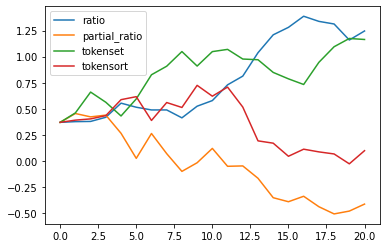

In [40]:
plt.plot(np.vstack(myActiveLearner.parameters));
plt.legend(['ratio', 'partial_ratio', 'tokenset', 'tokensort']);

## Blocking

In [41]:
X_training = myActiveLearner.learner.X_training
y_training = myActiveLearner.learner.y_training

In [42]:
myBlocking = Blocking('col').fit(X_training, y_training)

In [43]:
myBlocking.rules_selected

['first_word',
 'first_two_words',
 'first_three_letters',
 'first_four_letters',
 'first_five_letters',
 'first_three_letters_no_space',
 'first_four_letters_no_space',
 'first_five_letters_no_space']

In [44]:
pairs_table = myBlocking.transform(X_pool[:,0])
pairs_table.head(2)

,col_1,fingerprint,col_2
0,danone s a 75439 paris,danone:0,danone s a 75439 paris
2,danone s a 75439 paris,danone:0,danone s a 15 rue du helder 75439 paris france


## Scoring

In [45]:
scored_pairs_table = pairs_table.copy()

In [46]:
scored_pairs_table['score'] = myActiveLearner.predict_proba(pairs_table[['col_1', 'col_2']].values)[:,1]

In [47]:
scored_pairs_table.loc[scored_pairs_table.col_1==scored_pairs_table.col_2, 'score'] = 1

In [48]:
scored_pairs_table.head(2)

,col_1,fingerprint,col_2,score
0,danone s a 75439 paris,danone:0,danone s a 75439 paris,1.000000
2,danone s a 75439 paris,danone:0,danone s a 15 rue du helder 75439 paris france,0.982193


## Hierarchical clustering

In [49]:
df_clusters = hierarchical_clustering(scored_pairs_table)
df_clusters.head()

,cluster_id
danone s a 15 rue du helder 75439 paris france,1
danone s a 75439 paris,1
danone s a 15 rue du helder paris france,1
siemens aktiengesellschaft munich germany,4
siemens aktiengesellschaft werner von siemens strasse 1 80333 munich germany,4


## All in one

In [4]:
df_train = load_data(kind='childcare', return_pairs=False)

In [29]:
n_samples = 1_000

df_sample = df_train.sample(n=int(n_samples**0.5))

col = 'name_address'

sample_combinations = pd.DataFrame(list(product(df_sample[col].values.tolist(), df_sample[col].values.tolist())), columns=[f'{col}_1', f'{col}_2'])

In [30]:
sample_combinations

,name_address_1,name_address_2
0,Oglesby 7646 S. Green,Oglesby 7646 S. Green
1,Oglesby 7646 S. Green,Kiddy Kare Preschools Little Tykes I 1711 W. 35th Street
2,Oglesby 7646 S. Green,Mitchell 2233 W. Ohio
3,Oglesby 7646 S. Green,First Start Child Care Academy 4753-59 W. Washington
4,Oglesby 7646 S. Green,Chicago Youth Centers ABC 3415 W. 13th Pl.
...,...,...
956,Chicago Commons Association - Guadalupano Family Center 1814 S Paulina St,Christopher House - Lakeshore 850 W Eastwood Avenue
957,Chicago Commons Association - Guadalupano Family Center 1814 S Paulina St,YMCA of Metropolitan Chicago - South Chicago YMCA 3039 E 91st St
958,Chicago Commons Association - Guadalupano Family Center 1814 S Paulina St,ERIE NEIGHBORHOOD HOUSE FCCH-MARIA MAHECHA SITE 4151 W LAWRENCE
959,Chicago Commons Association - Guadalupano Family Center 1814 S Paulina St,Nicholson 6006 S. Peoria


In [7]:
# myDedupliPy = Deduplicator(X_initial, y_initial, 'col', 10)
myDedupliPy = Deduplicator('name_address', 10)

In [ ]:
myDedupliPy.fit(df_train)

In [32]:
res = myDedupliPy.predict(X_pool)
res.head()

,cluster_id
banco santander s a 28660 madrid spain,1
banco santander s a 28660 madrid,1
banco santander s a 28660,1
banco bilbao vizcaya argentaria s a bilbao,2
banco bilbao vizcaya argentaria s a 48005 bilbao spain,2
